# Apriori


## Importar las librerías


In [3]:
!pip install apyori

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Preprocesamiento de datos

Estos datos vienen de una tienda en la región sur de Francia, por lo tanto los gustos pueden no ser tan parecidos a los nuestros

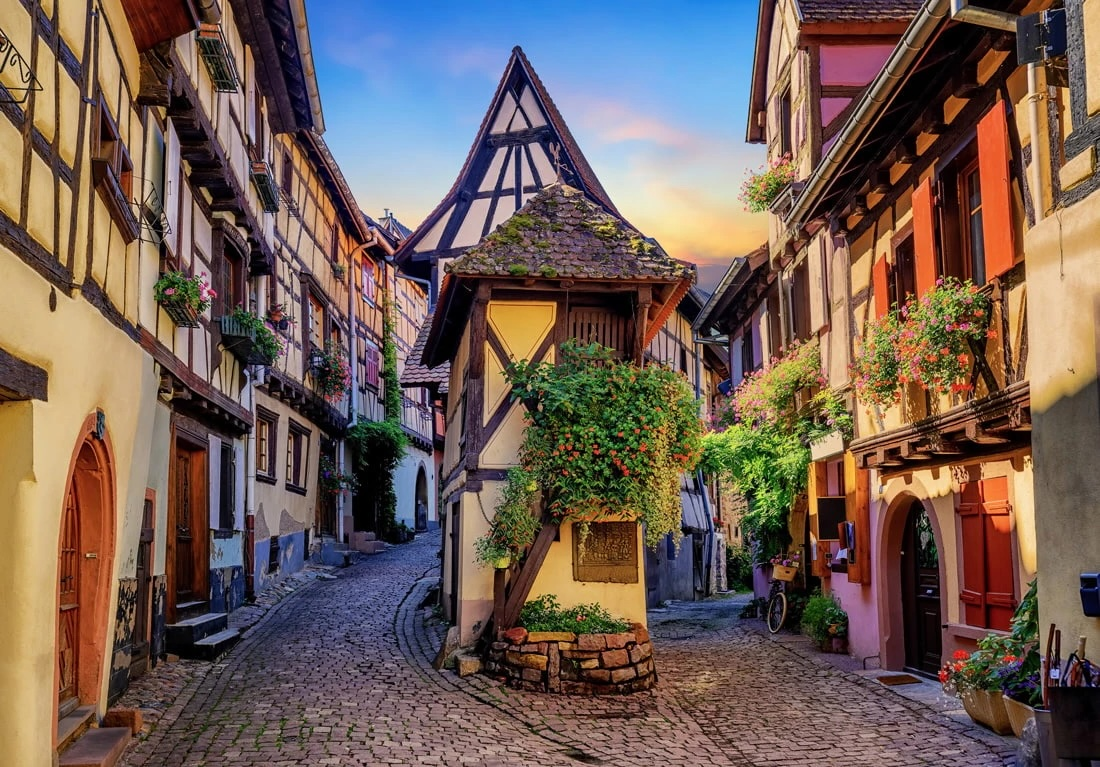


In [ ]:
datos = pd.read_csv(
    "Compras_Tienda.csv", header=None
)  # Datos empiezan desde la primera fila


datos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
datos.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notar que no hay encabezados de columnas. Cada fila es una transacción ie. un solo cliente y lo que compró

La función apyori trabaja con una lista de transacciones y no con DataFrames de Pandas. Por lo tanto hay que convertir los datos

También, la función apyori solo funciona con valores que son "strings", por lo que hay que hacer la conversión con la función str()


In [7]:
len(datos)

7501

In [ ]:
transacciones = []  # Lista en blanco
for i in range(0, len(datos)):
    transacciones.append(
        [str(datos.values[i, j]) for j in range(0, 20)]
    )  # Que es lo que queremos hacer y luego la instruccion de iteración

In [10]:
for i in range(5):
    print(transacciones[i])

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']
['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']
['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']


## Entrenamiento del modelo Apriori con el conjunto de datos

Para esto necesitamos ver los valores mínimos que debemos especificar.

**min_support**

Recordar que support es simplemente el número de transacciones donde aparecen los elementos de interés, sobre el total de transacciones. El valor mínimo es algo que dependerá de nuestro problema. En este caso el conjunto de transacciones es de 7501 por una semana. Basados en puro sentido común, podríamos decir que nos interesa si aparecen por lo menos 3 transacciones diarias. El soporte entonces sería (3 \* 7)/7501 = 0.002799...lo aproximaremos a 0.003

**min_confidence**

Para esta variable nos vamos a basar en algunos valores comunmente utilizados. R, por ejemplo tiene un paquete para Apriori y establece el valor default para min_confidente de 0.8. Esto puede ser demasiado alto...representa un 80%. Si resulta que los resultados son muy pocos, se podría probar la mitad de este valor, 0.4 (0.8/2). Si este no sigue siendo satisfactorio se podría volver a tomar la mitad, 0.2 (0.4/2). En este cadso, con 0.8 no hubo regla alguna. Con 0.4 todavía habían pocas reglas. Con 0.2 ya salió un número bonito de reglas. La idea es que es necesario ver cómo se ajusta al problema que se tiene.

**min_lift**

De nuevo, este es un dato que expresa algo sobre la calidad de las reglas. En base a la experiencia, el valor mínimo debiera ser por lo menos 3 (3, 4, 5, 6, 7 generalmente es un buen valor). Los valores menores de 3 resultan en reglas que no son muy relevantes.

Los otros dos parámetros tienen que ver con el número de elementos que queremos tener en las reglas. Si asumímos que estamos buscando algo para una oferta de "compre un producto y obtenga otro gratis", por ejemplo. Vamos a querer un producto a la izquierda de la regla y otro a la derecha...por lo tanto dos productos.


In [ ]:
from apyori import apriori

reglas = apriori(
    transactions=transacciones,
    min_support=0.003,
    min_confidence=0.2,
    min_lift=3,  # Mejora de confianza
    min_length=2,  # Minimo de la longitud de parámetros y esto nos sirve si el usuario quiere tanto un producto como el otro
    max_length=2,
)

## Visualización de los resultados


### Despliegue de los primeros resultados provenientes directamente de la función apriori


In [13]:
resultados = list(reglas)

In [ ]:
resultados

# Aquellos que compran crema liviana compran pollo.

# RelationRecord - tiene 3 items
# - items, productos que nos insteresan
# - ordered_statistics, cuenta que tiene los items, el item a agrgar la confidencia y el lift.abs

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

### Organizar mejor los resultados en un DataFrame de Pandas

OJO! Si vemos la primera regla, pareciera decir que aquellos que compran pollo, también compran crema light. En realidad es al revés y podemos ver la secuencia correcta más adelante en esa misma regla, donde dice _items_base=_

La siguiente función fue tomada de una de las discusiones en StackOverflow. Simplemente permite convertir los resultados del formato que genera la función "apriori", a un DataFrame de Pandas. Es bastante directa la interpretación pero no es de preocuparse si no se vé muy claro lo que hace.


In [18]:
def organizar(resultados):
    lado_izq = [tuple(resultado[2][0][0])[0] for resultado in resultados]
    lado_der = [tuple(resultado[2][0][1])[0] for resultado in resultados]
    supports = [resultado[1] for resultado in resultados]
    confidences = [resultado[2][0][2] for resultado in resultados]
    lifts = [resultado[2][0][3] for resultado in resultados]
    return list(zip(lado_izq, lado_der, supports, confidences, lifts))


df_resultados = pd.DataFrame(
    organizar(resultados),
    columns=["Lado Izquierdo", "Lado Derecho", "Support", "Confidence", "Lift"],
)

### Desplegar los resultados sin ordenar


In [19]:
df_resultados

,Lado Izquierdo,Lado Derecho,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


### Desplegar los resultados en orden descendente de Lift


In [20]:
df_resultados.nlargest(n=10, columns="Lift")

,Lado Izquierdo,Lado Derecho,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


Claro, el comerciante no aplicará las reglas así a ciegas....Compre queso blanco y lleve miel gratis. También tiene que tomar en cuenta los precios y asegurarse que no le salga mal el negocio.
